### Data frame extret de https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [1]:
import pandas as pd
import random
import scipy.stats as stats
import numpy as np
import statistics
import matplotlib.pyplot as plt
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
df=pd.read_csv('athlete_events.csv')
df = pd.concat([df, pd.get_dummies(df['Medal'].dropna())], axis=1)
df['Medalles'] = df[['Gold', 'Silver', 'Bronze']].dropna().sum(axis=1)
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,Medalles
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,NaN,NaN,NaN,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,NaN,NaN,NaN,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN,NaN,NaN,NaN


# Exercici 1
En els jocs olímpics d'hivern i en els jocs olímpics d'estiu hi ha diferents esports, 3 medalles per esport, però hi participen un diferent nombre de persones, per tant, es guanyen a l'estiu diferent nombre de medalles per persona que a l'hivern? Interpreto que NaN vol dir que no ha guanyat cap medalla.

In [2]:
#Arreglar les dades per obtenir el nº de medalles que ha guanyat cada atleta
medalles=df.groupby('ID')[['Gold','Silver','Bronze','Medalles']].agg('sum').reset_index()
print(medalles)

            ID  Gold  Silver  Bronze  Medalles
0            1   0.0     0.0     0.0       0.0
1            2   0.0     0.0     0.0       0.0
2            3   0.0     0.0     0.0       0.0
3            4   1.0     0.0     0.0       1.0
4            5   0.0     0.0     0.0       0.0
...        ...   ...     ...     ...       ...
135566  135567   0.0     0.0     0.0       0.0
135567  135568   0.0     0.0     0.0       0.0
135568  135569   0.0     0.0     0.0       0.0
135569  135570   0.0     0.0     0.0       0.0
135570  135571   0.0     0.0     0.0       0.0

[135571 rows x 5 columns]


In [3]:
def Mitja(df,columna):
    llista=list(df[columna].dropna())
    mitja=sum(llista)/len(llista)
    return mitja

In [4]:
medalles_estacio=df.groupby(['ID','Season'])[['Gold','Silver','Bronze','Medalles']].agg('sum').reset_index().dropna()
m_estacio=Mitja(medalles,'Medalles')

medalles_estiu=medalles_estacio.loc[(medalles_estacio['Season']=='Summer')]

medalles_hivern=medalles_estacio.loc[(medalles_estacio['Season']=='Winter')]

m_estiu=Mitja(medalles_estiu,'Medalles')

m_hivern=Mitja(medalles_hivern,'Medalles')
print('Mitges:                ',m_estacio,m_estiu,m_hivern)

desv_est_estacio=medalles_estacio['Medalles'].std()
desv_est_estiu=medalles_estiu['Medalles'].std()
desv_est_hivern=medalles_hivern['Medalles'].std()
print('Desviacions estandard: ',desv_est_estacio, desv_est_estiu, desv_est_hivern)

Mitges:                 0.2934477137440898 0.29190929643077346 0.3004008861694272
Desviacions estandard:  0.7208120120397696 0.7102720397136636 0.7825919252709592


Text(0.5, 0, 'Nº de medalles')

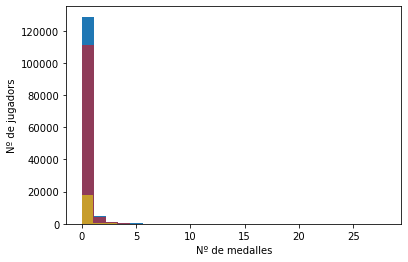

In [5]:
#Representació gràfica de la distribució
plt.hist(medalles_estacio['Medalles'], bins=25, histtype='bar') 
plt.hist(medalles_estiu['Medalles'], bins=25, histtype='bar', color='red', alpha=0.5) 
plt.hist(medalles_hivern['Medalles'], bins=12, histtype='bar', color='yellow', alpha=0.5) 
plt.ylabel('Nº de jugadors')
plt.xlabel('Nº de medalles')

A simple vista sembla que hi ha diferències entre el nº de medalles que consegueix una persona en els jocs d'hivern i en els jocs d'estiu, però és una diferència significativa?

La $H_{0}$ seria que no hi ha diferències, per tant m_estiu = m_hivern.

La $H_{a}$ seria que sí hi ha diferències, per tant m_estiu ≠ m_hivern.

L'α és de 5% (0,05).

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fkeydifferences.com%2Fwp-content%2Fuploads%2F2016%2F05%2Fparametric-vs-non-parametric-test-hierarchy.jpg&f=1&nofb=1" width="500">



En aquest cas com son mostres independents no paramètriques, farem servir la U de Mann Whitney.

In [6]:
stataistic, pvalue=stats.mannwhitneyu(x=medalles_estiu['Medalles'], y=medalles_hivern['Medalles'], alternative = 'two-sided')
print(pvalue)

2.137770814632011e-05


El p valor és <0,05 per tant hi ha diferències significatives entre el nombre de medalles per persona en els jocs d'estiu i els d'hivern.

# Exercici 2
Per exemple pes i alçada, per veure si hi ha relació entre el pes i l'alçada faré servir un test de Correlació de Pearson.

$H_{0}$: No hi ha relació entre el pes i l'alçada, són dues variables independents de cada persona.

$H_{a}$: Sí que hi ha relació entre el pes i l'alçada de cada persona, són variables dependents.

α de 5% (0,05).

In [7]:
#Seleccionem el pes i l'alçada més recents de cada jugador
serie=df.groupby('ID').agg({'Name':'first','Height' : 'last','Weight':'last','Age':'last','Medalles':'sum'}).dropna().reset_index()

result = stats.linregress(serie['Height'], serie['Weight'])
print('pendent:             ','%.5f' %(result.slope))
print('intersecció:         ','%.5f' %(result.intercept))
print('correlació r:        ','%.5f' %(result.rvalue))
print('p valor:             ','%.5f' %(result.pvalue))
print('desviació estandard: ','%.5f' %(result.stderr))


pendent:              1.08691
intersecció:          -119.73422
correlació r:         0.77569
p valor:              0.00000
desviació estandard:  0.00281


El p valor és <0,05 per tant l'alçada i el pes són atributs dependents, contra més alt és el jugador més pesarà. Però la correlació r no és gaire alta, així que no s'ajusta gaire a la recta de regressió.

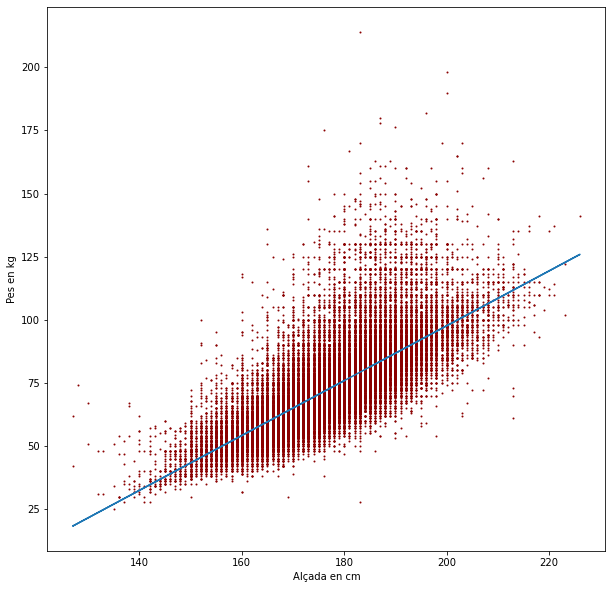

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(serie['Height'], serie['Weight'],s=1,c='darkred',marker='o')
plt.ylabel('Pes en kg')
plt.xlabel('Alçada en cm')

plt.plot(serie['Height'], result.slope*serie['Height'] + result.intercept)

# Exercici 3
Seleccionem 3 atributs: explica l'alçada i l'edat el pes d'un atleta dels jocs olímpics?

In [9]:
serie.tail()

,ID,Name,Height,Weight,Age,Medalles
99083,135567,Aleksandr Viktorovich Zyuzin,183.0,72.0,28.0,0.0
99084,135568,Olga Igorevna Zyuzkova,171.0,69.0,33.0,0.0
99085,135569,Andrzej ya,179.0,89.0,29.0,0.0
99086,135570,Piotr ya,176.0,59.0,27.0,0.0
99087,135571,Tomasz Ireneusz ya,185.0,96.0,34.0,0.0


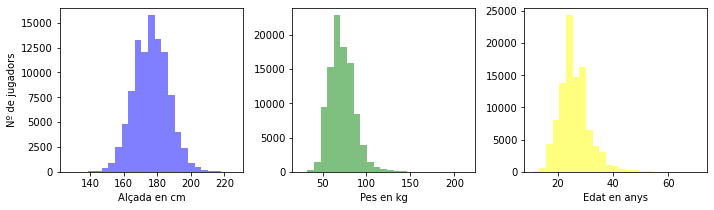

In [10]:
plt.rcParams["figure.figsize"] = (10,3)

plt.subplot(1, 3, 1)
plt.hist(serie['Height'], bins=25, histtype='bar', color='blue', alpha=0.5) 
plt.ylabel('Nº de jugadors')
plt.xlabel('Alçada en cm')

plt.subplot(1, 3, 2)
plt.hist(serie['Weight'], bins=25, histtype='bar', color='green', alpha=0.5) 
plt.xlabel('Pes en kg')

plt.subplot(1, 3, 3)
plt.hist(serie['Age'], bins=25, histtype='bar', color='yellow', alpha=0.5) 
plt.xlabel('Edat en anys')

plt.tight_layout(pad=1)

Text(0.5, 0, 'Pes kg')

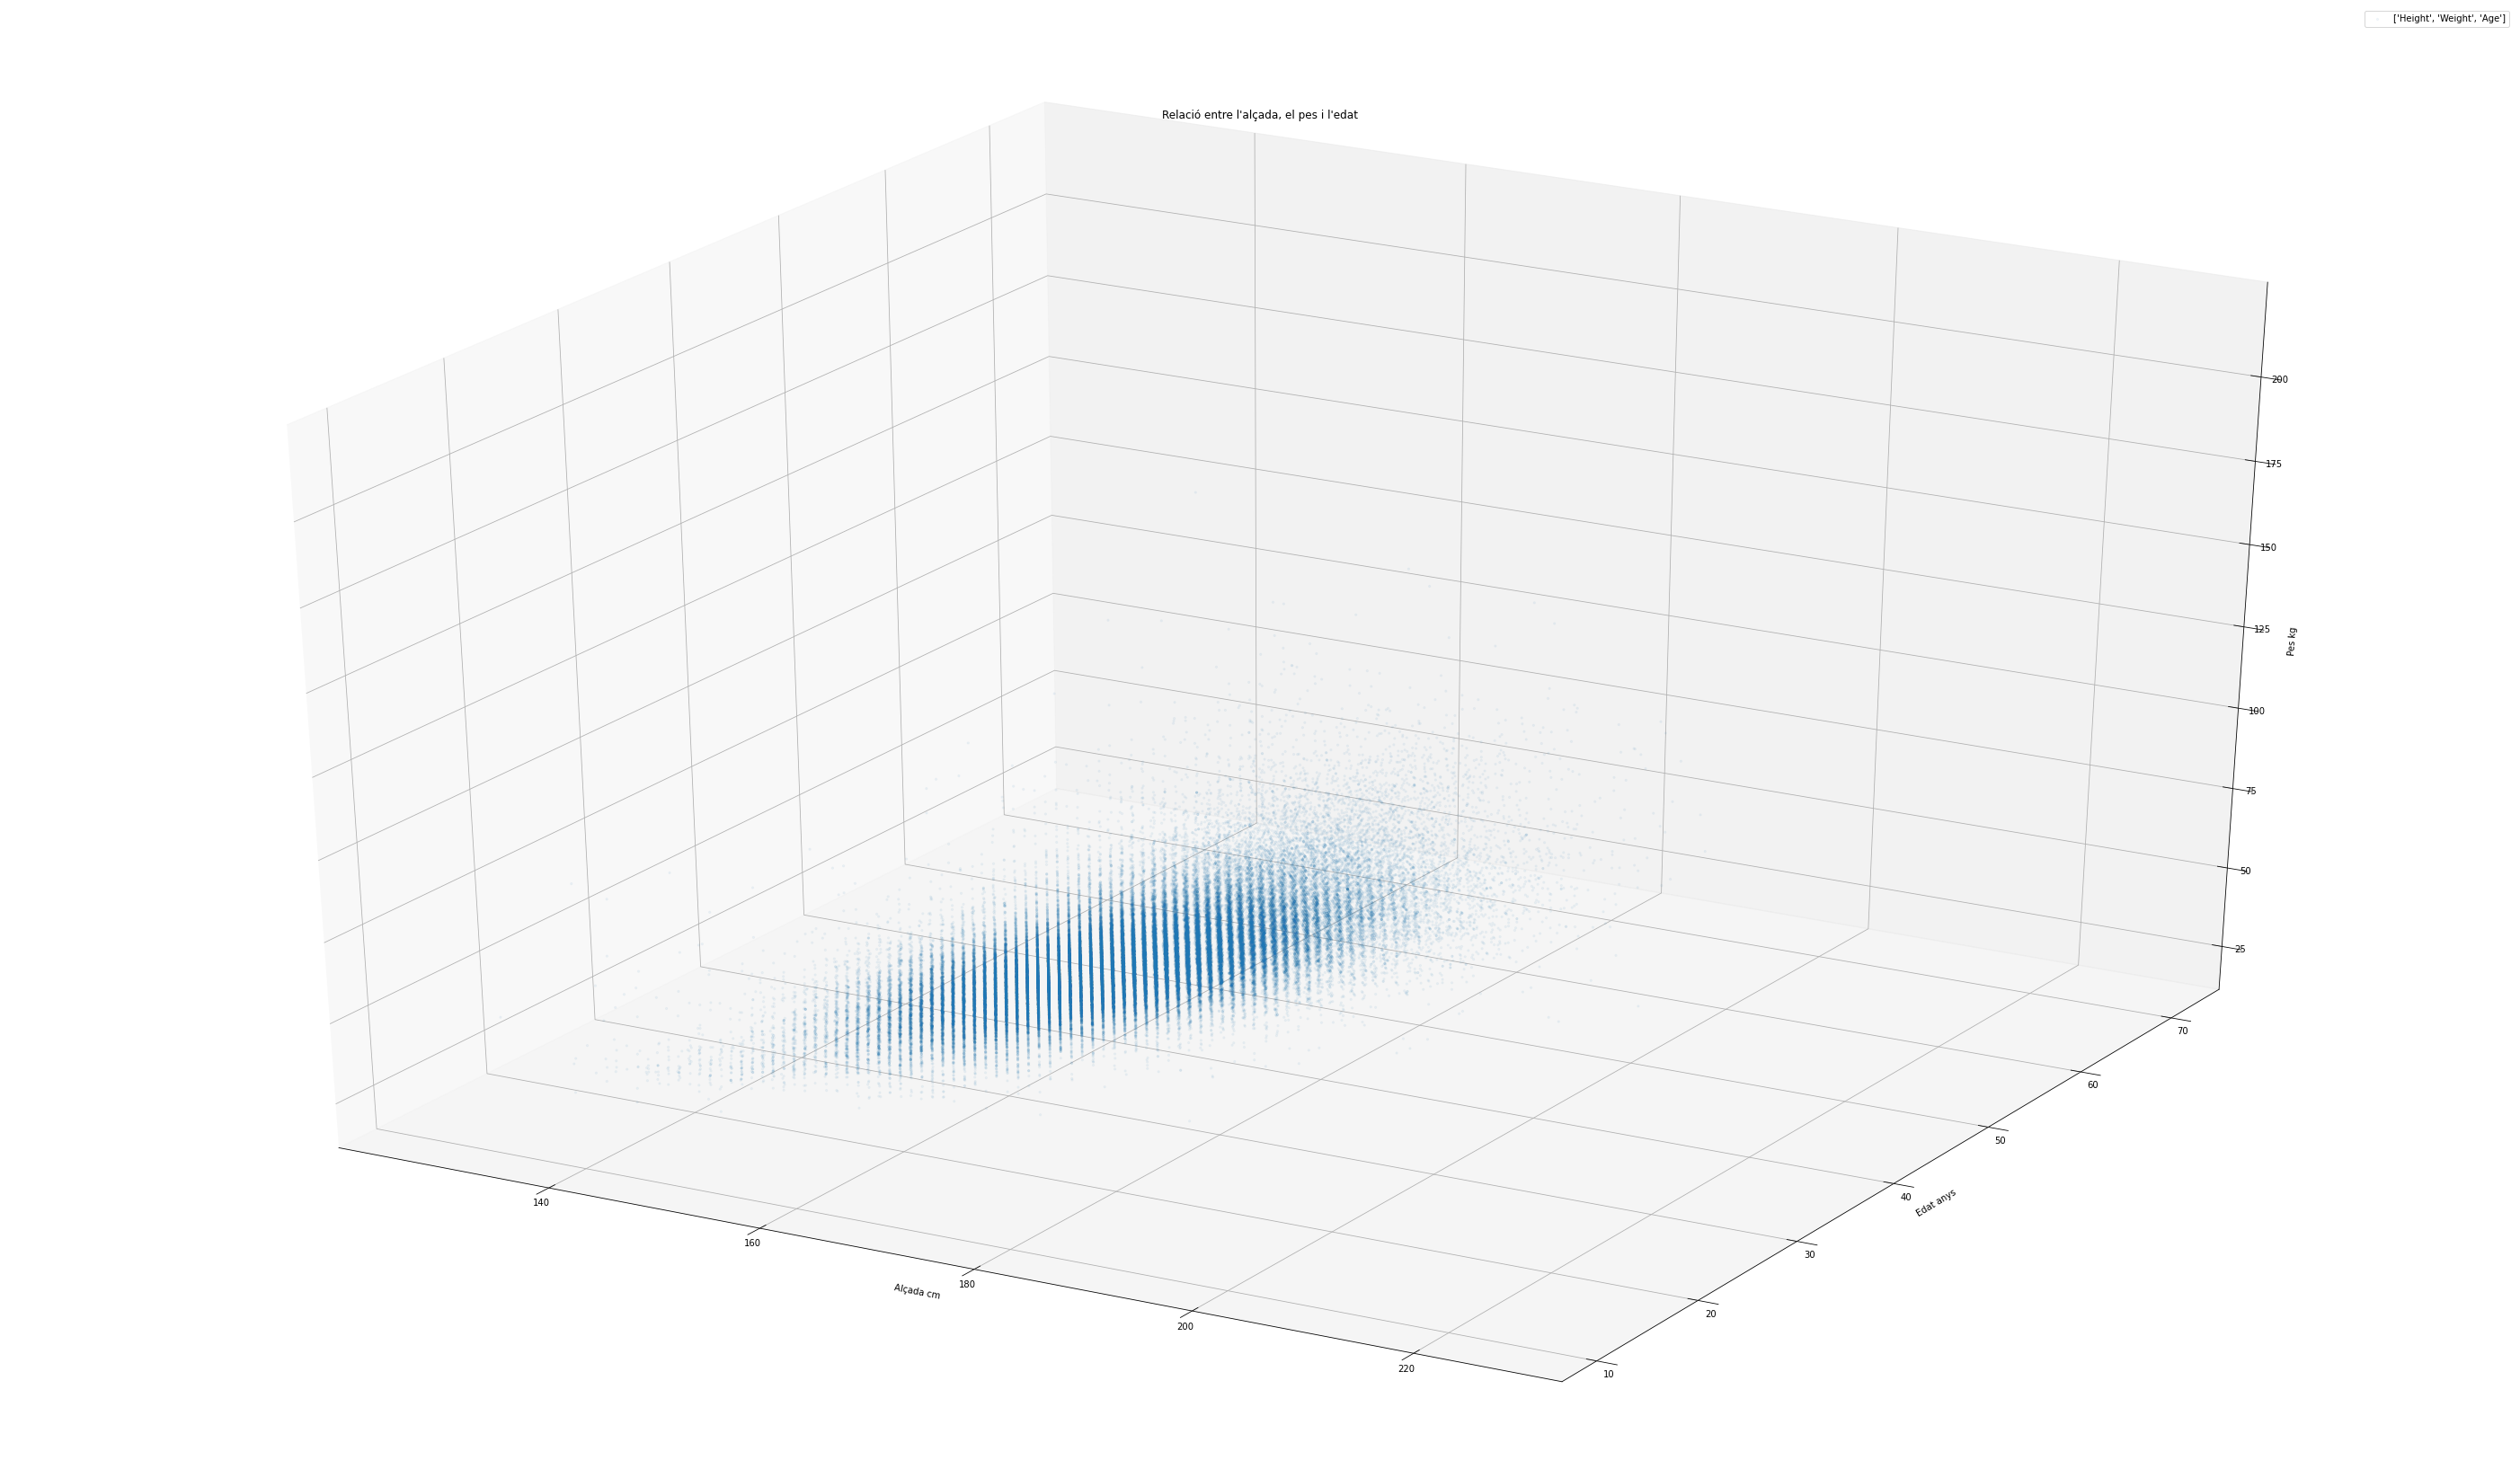

In [25]:
#Grafic 3D de la relació entre l'alçada, el pes i l'edat
ax = plt.axes(projection='3d')

plt.rcParams["figure.figsize"] = (20,50)
ax.scatter3D(serie["Height"], serie["Age"], serie["Weight"],s=5, label = ['Height','Weight','Age'], alpha=0.05)

plt.legend()
plt.title("Relació entre l'alçada, el pes i l'edat", loc="center")
ax.set_xlabel('Alçada cm', labelpad=10)
ax.set_ylabel('Edat anys', labelpad=10)
ax.set_zlabel('Pes kg', labelpad=10)

In [12]:
Y = list(serie['Weight'])
print(Y[:5])
X = []
x = []
for i in range(len(serie)):
    x.append(serie.loc[i,'Height'])
    x.append(serie.loc[i,'Age'])
    X.append(x)
    x=[]
print(X[:10])

[80.0, 60.0, 82.0, 75.0, 72.0]
[[180.0, 24.0], [170.0, 23.0], [185.0, 27.0], [188.0, 33.0], [183.0, 33.0], [186.0, 26.0], [182.0, 22.0], [172.0, 31.0], [159.0, 34.0], [171.0, 32.0]]


In [13]:
#Regressió lineal múltiple
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [14]:
r_sq = model.score(X, Y)
print(f"coeficient de determinació (r): {r_sq}")
print(f"intersecció (b0):               {model.intercept_}")
print(f"coeficients (b1 i b2):          {model.coef_}")
print(f'R2:                             {model.score(X,Y)}')
Y_pred = model.predict(X)
print(f"predicció:                      {Y_pred}")

coeficient de determinació (r): 0.6138870649321351
intersecció (b0):               -124.49526755205088
coeficients (b1 i b2):          [1.0706269  0.29391464]
R2:                             0.6138870649321351
predicció:                      [75.27152644 64.27134277 81.50640489 ... 75.67047275 71.87076276
 83.56380739]


Per tant l'equació de la recta és: y = -124,5 + 1,07*x1 + 0,29*x2

y és l'edat

x1 és l'alçada

x2 és el pes


Però com de bé s'ajusta aquesta recta als resultats?

In [15]:
#Matriu d'errors
E = Y-Y_pred
print(E)

[  4.72847356  -4.27134277   0.49359511 ...  13.32952725 -12.87076276
  12.43619261]


Depèn el pes de l'alçada? Comprovar si beta1 ≠ 0.

$H_{0}$: la beta1 és igual a 0 (per tant l'alçada no influeix)

$H_{a}$: la beta1 és diferent de 0 (per tant l'alçada sí que influeix)

També comprovar si el pes depèn de l'edat:

$H_{0}$: la beta2 = 0.

$H_{a}$: beta2 ≠ 0.

In [16]:
#Taula d'ANOVA d'una regressió múltiple, per x1:
#Font variança:  graus llibertat:        Suma Cuadrados:                          Cuadrado Medio:                                       F
#Regressió       nº de betes: 2          Suma Productes x1y^2/Suma Cuadrados x1   Suma Cuadrados reg/gll reg (var de les mitges*n)      CMreg/CMresidu
#Residu          gll totals-reg: 99085   Total - Regressió                        variança dels valors residuals o SCresidu/gll residu
#Total           n-1: 99088-1: 99087     Suma de (y^2) -(suma de y)^2/n

In [17]:
#Graus de llibertat
gll_reg=len(X[2])
gll_total = len(X)-1
gll_residu = gll_total-gll_reg
print(gll_reg, gll_residu, gll_total)

2 99085 99087


In [18]:
#Ordenar les dades, x1 és l'alçada i x2 és l'edat, calcular mitges
x1 = []
x2 = []
for i in X:
    x1.append(i[0])
    x2.append(i[1])
#print(x2)
x1mitja = sum(x1)/len(x1)
print(x1mitja)
x2mitja = sum(x2)/len(x2)
print(x2mitja)
Ymitja = sum(Y)/len(Y)
print(Ymitja)

176.36665388341677
25.967614645567576
71.959879097368


In [19]:
#Calculs de sumes de quadrats de l'ANOVA i calcul del estadístic F
def F_valor(x, Y, gll_reg, gll_total):
    n=len(Y)
    xmitja = sum(x)/len(x)
    Ymitja = sum(Y)/len(Y)
    gll_residu = gll_total-gll_reg
    
    SPxY = 0 #SPxy és el sumatori de xi-xmitja * yi-ymitja
    for i in range(len(Y)):
        SPxY += (x[i]-xmitja)*(Y[i]-Ymitja)

    SCx = 0
    for i in x:
        SCx += (i-xmitja)**2

    SCreg = (SPxY**2)/SCx

    SumY2 = 0
    SumY = 0
    for i in Y:
        SumY += i
        SumY2 += i**2

    SCtotal = (SumY2)-((SumY**2)/n)

    SCresidu = SCtotal-SCreg
    
    CMreg = SCreg/gll_reg
    
    CMresidu = SCresidu/gll_residu

    F = CMreg/CMresidu
    
    return F

In [20]:
#Calcul del estadístic F x1 (alçada) i x2 (edat)
F_x1 = F_valor(x1, Y, gll_reg, gll_total)
F_x2 = F_valor(x2, Y, gll_reg, gll_total)

print(F_x1, F_x2)

#Calcul del p valor de x1 i x2
p_value_x1 = stats.f.sf(F_x1, gll_reg, gll_residu)
p_value_x2 = stats.f.sf(F_x2, gll_reg, gll_residu)

print(p_value_x1, p_value_x2)

74842.41857172178 1875.326319110994
0.0 0.0


Tant pel pes com per l'edat el p valor és < 0,05, per tant en els dos casos influeixen en el pes de la persona.

In [21]:
#Una altra manera de fer la regressió lineal
from sklearn import linear_model 
regr = linear_model.LinearRegression()
regr.fit(X, Y) 

#Predicció d'un atleta a partir de la regressió
predictedWeight = regr.predict([[170, 23]])

print('Un atleta de 170 cm d\'alçada i 23 anys pesaria',float(predictedWeight),'kg.') 

Un atleta de 170 cm d'alçada i 23 anys pesaria 64.27134276855048 kg.


In [22]:
y = -124.49526755205088 + 1.0706269*170 + 0.29391464*23
print(y)

64.27134216794913
